## Time to get you hands dirty!  Position of a quasar

You measure the position of a quasar $N$ times with the *same* telescope i.e. errors are homoscedastic. Let's say the underlying process is Gaussian, the true position is $\mu = 1$ (in suitable units), and the errors are $\sigma=0.2$.

### Part 1

- Generate fake measurements. Treat each of these observations as an estimate of the true distribution. So we'll center a Gaussian (with the known $\sigma$) at each point. This is the probability of each data point, $p(x_i|\mu,\sigma)$.

Text(0.5, 1.0, 'samples histogram')

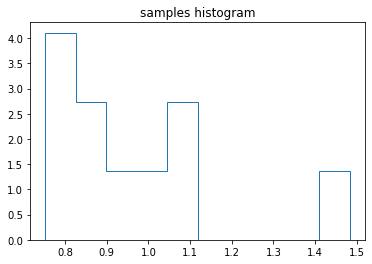

In [233]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm 

Nsamples = 10

mean = 1
sigma = 0.2

samples = np.random.normal (mean, sigma, Nsamples)

#drawing the histogram of our samples
plt.hist(samples, Nsamples, density = True, histtype = 'step')
plt.title('samples histogram')

- Plot each of the individual likelihoods separately.  Also plot their product (i.e. the likelihood of the dataset $\{x_i\}$). Make sure the x grid has enough points.


Text(0.5, 1.0, "samples' gaussians and total llh")

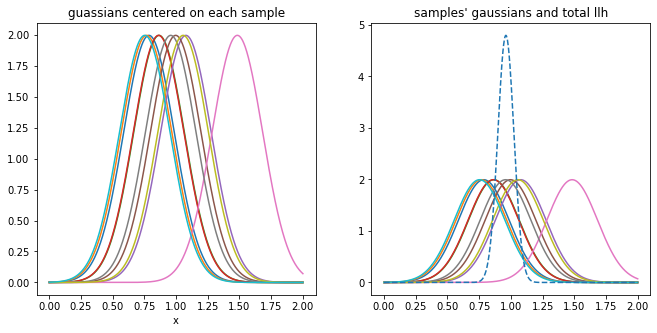

In [234]:
#and the gaussians centered on each sample

x = np.linspace(0, 2, 1000)
llh_i = np.array([norm.pdf(x, s, sigma) for s in samples]) #creating an array with the likelihoods

fig = plt.figure(figsize=(11, 11))

#1st plot
ax = fig.add_subplot(221)
ax.set(title = 'guassians centered on each sample', xlabel='x')
for l in llh_i:
    ax.plot(x, l)

#2nd plot
llh = np.prod(llh_i, axis = 0) #total likelihood
ax = fig.add_subplot(222)
for l in llh_i:
    ax.plot(x, l)
ax.plot(x, llh, linestyle = 'dashed')
ax.set_title("samples' gaussians and total llh")

- Just read off the maximum likelihood solution (checkout np.argsort)
- Compare it with the MLE estimator derived above

In [235]:
#comparing the llh maximum with our estimator (which corresponds to the mean of the samples,
#since they are distributed gaussianly).

est_mean = np.mean(samples) #estimator
MLE_mean = x[np.argmax(llh)] #the x value at which the log llh is maximised

print('llh is max at:', x_max, '\t while the estimated mean is:', MLE_mean)

llh is max at: 1.065065065065065 	 while the estimated mean is: 0.960960960960961


### Part 2

Check the Fisher matrix error estimate makes sense
- do a rough $2^\mathrm{nd}$ order differentation of our log-likelihood function with `np.diff`, 
- divide through by our $\Delta \theta^2$ to get the correct normalization, 
- multiply by $-1$, 
- then take the square root.
- Compare with the Fisher matrix error derived above
- Plot a Gaussian at the measured $\mu$ with this error as the scale to see if it matches the numerical likelihood distribution. (The normalization won't be captured, you can rescale it as you like to check it agrees) 


Our sigma estimator is 0.06324555320339606 , while the Fisher matrix error is 0.06324555320336758


(0.6, 1.5)

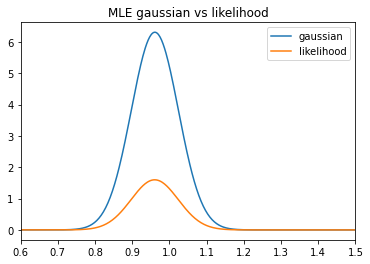

In [236]:
diff_llh = np.diff(log_llh, 2) #all the elements in the array are the same since llh is a parabola
#normalization + computation
diff_llh /= -1 * (x[1] - x[0])**2
diff_llh = np.power(diff_llh[np.argmax(log_llh)], -1/2)

MLE_sigma = sigma /np.sqrt(Nsamples)
print('Our sigma estimator is', diff_llh, ', while the Fisher matrix error is', MLE_sigma)

#plotting the gaussian we obtained
gauss = norm(MLE_mean, MLE_sigma)
plt.plot(x, gauss.pdf(x), label='gaussian')

#along with the numerical llh
const = 1/3
plt.plot(x, const * llh, label = 'likelihood')

plt.title('MLE gaussian vs likelihood')
plt.legend()
plt.xlim([0.6, 1.5])


### Part 3

Let's make our model more realistic. Our $N$ measurements were taken in different nights, where the sky behaved differently (i.e. errors are heteoscedastic). Let's assume that each measurment has a $\sigma_i$ that is normally distribured with mean $0.2$ and standard deviation $0.05$

- Generalize your code from above to this case

Text(0.5, 1.0, "samples' gaussians and total llh")

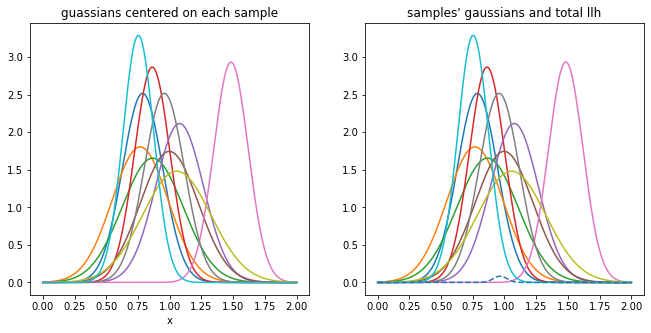

In [237]:
errors = np.random.normal (0.2, 0.05, Nsamples)

mean = 1
sigma = 0.2

x = np.linspace(0, 2, 1000)
llh_i = np.array([norm.pdf(x, s, e) for s, e in zip(samples, errors)])

fig = plt.figure(figsize=(11, 11))

#1st plot
ax = fig.add_subplot(221)
ax.set(title = 'guassians centered on each sample', xlabel='x')
for l in llh_i:
    ax.plot(x, l)

#2nd plot
llh = np.prod(llh_i, axis = 0) #total likelihood
ax = fig.add_subplot(222)
for l in llh_i:
    ax.plot(x, l)
ax.plot(x, llh, linestyle = 'dashed')
ax.set_title("samples' gaussians and total llh")

llh is max at: 1.065065065065065 	 while the estimated mean is: 0.964964964964965
Our sigma estimator is 0.06324555320339606 , while the Fisher matrix error is 0.06324555320336758


(0.6, 1.5)

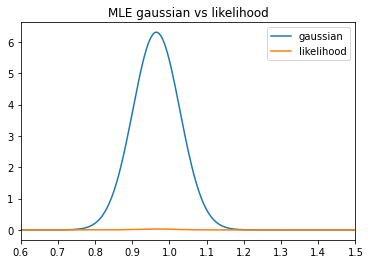

In [238]:
est_mean = np.mean(samples) #estimator
MLE_mean = x[np.argmax(llh)] #the x value at which the log llh is maximised

print('llh is max at:', x_max, '\t while the estimated mean is:', MLE_mean)
diff_llh = np.diff(log_llh, 2)
#normalization + computation
diff_llh /= -1 * (x[1] - x[0])**2
diff_llh = np.power(diff_llh[np.argmax(log_llh)], -1/2)

MLE_sigma = sigma /np.sqrt(Nsamples)
print('Our sigma estimator is', diff_llh, ', while the Fisher matrix error is', MLE_sigma)

#plotting the gaussian we obtained
gauss = norm(MLE_mean, MLE_sigma)
plt.plot(x, gauss.pdf(x), label='gaussian')

#along with the numerical llh
const = 1/3
plt.plot(x, const * llh, label = 'likelihood')

plt.title('MLE gaussian vs likelihood')
plt.legend()
plt.xlim([0.6, 1.5])